In [1]:
import pandas as pd
import numpy as np
import json
import math
import copy

from pandas.io.json import json_normalize

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

In [2]:
# Population
with open('static_dic/pop_evol.json') as file:
    data = json.load(file)

df_pop = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_pop.set_index('code', inplace=True)

In [3]:
# Logement
with open('static/logement.json') as file:
    data = json.load(file)

df_log = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_log.set_index('inseecode', inplace=True)

In [4]:
# Partis
with open('static_dic/partisidf.json') as file:
    data = json.load(file)
    


df_party = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_party.set_index('code', inplace=True)

In [5]:
# Baccalauréat
with open('static_dic/Bac_js2.json') as file:
    data = json.load(file)

df_bac = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_bac.set_index('Code', inplace=True)

In [6]:
# Chômage
with open('static_dic/chomage.json') as file:
    data = json.load(file)

df_chom = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_chom.set_index('code', inplace=True)

In [ ]:
# Siren
with open('static_dic/sirene77_01_01_18.json') as file:
    data = json.load(file)

df_sir = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_sir.set_index('code', inplace=True)

In [7]:
# Budget
with open('static_dic/budgets_idf.json') as file:
    data = json.load(file)

df_budg = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_budg.set_index('code', inplace=True)

In [8]:
dataframe = pd.concat([df_pop, df_log, df_party, df_bac, df_chom], axis=1, join='outer')

In [9]:
dataframe.head()

,Pop06,Pop07,Pop09,Pop10,Pop11,Pop46,Pop62,Pop68,Pop75,Pop82,...,Resultat_2016_(50-70),Resultat_2016_(70-80),Resultat_2016_(80-90),Resultat_2016_(90),Resultat_2017_(50),Resultat_2017_(50-70),Resultat_2017_(70-80),Resultat_2017_(80-90),Resultat_2017_(90),chomage
75102,21259.0,21745.48,22400.0,23009.0,22927.0,41419.0,40864.0,35357.0,26328.0,21203.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75103,34721.0,34575.78,35655.0,35652.0,36120.0,64393.0,62680.0,56252.0,41706.0,36094.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,NaN
75104,29138.0,28571.58,28192.0,28012.0,27887.0,60082.0,61670.0,54029.0,40466.0,33990.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,NaN
75106,45278.0,45332.06,43143.0,43451.0,43880.0,83963.0,80262.0,70891.0,56331.0,48905.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,NaN
75108,39088.0,39164.98,40278.0,41280.0,40589.0,72438.0,74577.0,67897.0,52999.0,46403.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,NaN


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 75102 to None
Data columns (total 99 columns):
Pop06                    1300 non-null float64
Pop07                    1300 non-null float64
Pop09                    1300 non-null float64
Pop10                    1300 non-null float64
Pop11                    1300 non-null float64
Pop46                    1300 non-null float64
Pop62                    1300 non-null float64
Pop68                    1300 non-null float64
Pop75                    1300 non-null float64
Pop82                    1300 non-null float64
Pop90                    1300 non-null float64
Pop99                    1300 non-null float64
housing                  1277 non-null float64
main_res                 1277 non-null float64
portion_hlm_tenant       1277 non-null float64
partis.2001              1278 non-null object
partis.2008              1278 non-null object
partis.2014              1278 non-null object
NbLycees_2008            231 non-null float64
NbLyc

In [11]:
dataframe.sample(20)

,Pop06,Pop07,Pop09,Pop10,Pop11,Pop46,Pop62,Pop68,Pop75,Pop82,...,Resultat_2016_(50-70),Resultat_2016_(70-80),Resultat_2016_(80-90),Resultat_2016_(90),Resultat_2017_(50),Resultat_2017_(50-70),Resultat_2017_(70-80),Resultat_2017_(80-90),Resultat_2017_(90),chomage
78126,21202.0,20998.80,20844.0,20971.0,21181.0,2843.0,20284.0,24687.0,25696.0,23326.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10.8
77110,284.0,282.31,295.0,302.0,313.0,281.0,289.0,244.0,229.0,253.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5
91080,1294.0,1308.00,1335.0,1324.0,1319.0,350.0,423.0,617.0,783.0,812.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.8
77066,286.0,284.12,299.0,305.0,311.0,309.0,309.0,275.0,223.0,191.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5
91549,34024.0,34410.87,34054.0,34195.0,34771.0,10475.0,17660.0,23684.0,31859.0,30439.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.8
78688,12366.0,12152.65,11910.0,11730.0,11631.0,463.0,594.0,680.0,2132.0,5229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8
77253,190.0,189.98,190.0,190.0,196.0,125.0,104.0,124.0,132.0,125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9
77404,1705.0,1723.03,1753.0,1769.0,1786.0,977.0,1209.0,1178.0,1309.0,1407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5
95313,11231.0,11465.84,11575.0,11744.0,11880.0,4160.0,5891.0,6920.0,9971.0,9479.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10.1
95144,64.0,64.49,67.0,69.0,71.0,61.0,69.0,53.0,69.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5


In [12]:
print(dataframe.notnull().sum())
dataframe.shape

Pop06                    1300
Pop07                    1300
Pop09                    1300
Pop10                    1300
Pop11                    1300
Pop46                    1300
Pop62                    1300
Pop68                    1300
Pop75                    1300
Pop82                    1300
Pop90                    1300
Pop99                    1300
housing                  1277
main_res                 1277
portion_hlm_tenant       1277
partis.2001              1278
partis.2008              1278
partis.2014              1278
NbLycees_2008             231
NbLycees_2009             231
NbLycees_2010             231
NbLycees_2011             231
NbLycees_2012             231
NbLycees_2013             231
NbLycees_2014             231
NbLycees_2015             231
NbLycees_2016             231
NbLycees_2017             231
PrivÃ©_2008               231
PrivÃ©_2009               231
                         ... 
Resultat_2012_(50-70)     231
Resultat_2012_(70-80)     231
Resultat_2

(1302, 99)

In [13]:
extracted_features = ['NbLycees_2008', 'NbLycees_2009', 'NbLycees_2010', 'NbLycees_2011', 'NbLycees_2012', 'NbLycees_2013', 'NbLycees_2014', 'NbLycees_2015', 'NbLycees_2016', 'NbLycees_2017', 'PrivÃ©_2008', 'PrivÃ©_2009', 'PrivÃ©_2010', 'PrivÃ©_2011', 'PrivÃ©_2012', 'PrivÃ©_2013', 'PrivÃ©_2014', 'PrivÃ©_2015', 'PrivÃ©_2016', 'PrivÃ©_2017', 'Public_2008', 'Public_2009', 'Public_2010', 'Public_2011', 'Public_2012', 'Public_2013', 'Public_2014', 'Public_2015', 'Public_2016', 'Public_2017', 'Resultat_2008_(50)', 'Resultat_2008_(50-70)', 'Resultat_2008_(70-80)', 'Resultat_2008_(80-90)', 'Resultat_2008_(90)', 'Resultat_2009_(50)', 'Resultat_2009_(50-70)', 'Resultat_2009_(70-80)', 'Resultat_2009_(80-90)', 'Resultat_2009_(90)', 'Resultat_2010_(50)', 'Resultat_2010_(50-70)', 'Resultat_2010_(70-80)', 'Resultat_2010_(80-90)', 'Resultat_2010_(90)', 'Resultat_2011_(50)', 'Resultat_2011_(50-70)', 'Resultat_2011_(70-80)', 'Resultat_2011_(80-90)', 'Resultat_2011_(90)', 'Resultat_2012_(50)', 'Resultat_2012_(50-70)', 'Resultat_2012_(70-80)', 'Resultat_2012_(80-90)', 'Resultat_2012_(90)', 'Resultat_2013_(50)', 'Resultat_2013_(50-70)', 'Resultat_2013_(70-80)', 'Resultat_2013_(80-90)', 'Resultat_2013_(90)', 'Resultat_2014_(50)', 'Resultat_2014_(50-70)', 'Resultat_2014_(70-80)', 'Resultat_2014_(80-90)', 'Resultat_2014_(90)', 'Resultat_2015_(50)', 'Resultat_2015_(50-70)', 'Resultat_2015_(70-80)', 'Resultat_2015_(80-90)', 'Resultat_2015_(90)', 'Resultat_2016_(50)', 'Resultat_2016_(50-70)', 'Resultat_2016_(70-80)', 'Resultat_2016_(80-90)', 'Resultat_2016_(90)', 'Resultat_2017_(50)', 'Resultat_2017_(50-70)', 'Resultat_2017_(70-80)', 'Resultat_2017_(80-90)', 'Resultat_2017_(90)']
for column in extracted_features :
    for line in dataframe.index :
        if np.isnan(dataframe.loc[line, column]) :
            dataframe.loc[line,column] = 0

print('\n', 'Dataframe : ', dataframe.notnull().sum())


 Dataframe :  Pop06                    1300
Pop07                    1300
Pop09                    1300
Pop10                    1300
Pop11                    1300
Pop46                    1300
Pop62                    1300
Pop68                    1300
Pop75                    1300
Pop82                    1300
Pop90                    1300
Pop99                    1300
housing                  1277
main_res                 1277
portion_hlm_tenant       1277
partis.2001              1278
partis.2008              1278
partis.2014              1278
NbLycees_2008            1302
NbLycees_2009            1302
NbLycees_2010            1302
NbLycees_2011            1302
NbLycees_2012            1302
NbLycees_2013            1302
NbLycees_2014            1302
NbLycees_2015            1302
NbLycees_2016            1302
NbLycees_2017            1302
PrivÃ©_2008              1302
PrivÃ©_2009              1302
                         ... 
Resultat_2012_(50-70)    1302
Resultat_2012_(70-80)    

In [14]:
dataframe.head(10)

,Pop06,Pop07,Pop09,Pop10,Pop11,Pop46,Pop62,Pop68,Pop75,Pop82,...,Resultat_2016_(50-70),Resultat_2016_(70-80),Resultat_2016_(80-90),Resultat_2016_(90),Resultat_2017_(50),Resultat_2017_(50-70),Resultat_2017_(70-80),Resultat_2017_(80-90),Resultat_2017_(90),chomage
75102,21259.0,21745.48,22400.0,23009.0,22927.0,41419.0,40864.0,35357.0,26328.0,21203.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
75103,34721.0,34575.78,35655.0,35652.0,36120.0,64393.0,62680.0,56252.0,41706.0,36094.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,NaN
75104,29138.0,28571.58,28192.0,28012.0,27887.0,60082.0,61670.0,54029.0,40466.0,33990.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,NaN
75106,45278.0,45332.06,43143.0,43451.0,43880.0,83963.0,80262.0,70891.0,56331.0,48905.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,NaN
75108,39088.0,39164.98,40278.0,41280.0,40589.0,72438.0,74577.0,67897.0,52999.0,46403.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,NaN
75111,152436.0,151420.78,152744.0,153202.0,154647.0,188547.0,193349.0,179727.0,159317.0,146931.0,...,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,3.0,NaN
75112,141519.0,142425.30,142897.0,144262.0,144402.0,153633.0,161574.0,155982.0,140900.0,138015.0,...,0.0,0.0,2.0,5.0,0.0,0.0,1.0,1.0,5.0,NaN
75113,178716.0,179212.96,182032.0,181532.0,183260.0,159722.0,166709.0,158280.0,163313.0,170818.0,...,0.0,0.0,2.0,9.0,0.0,1.0,0.0,5.0,5.0,NaN
75118,190854.0,191523.27,200631.0,202685.0,203127.0,259589.0,254974.0,236776.0,208970.0,186866.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,3.0,NaN
77001,1235.0,1242.20,1242.0,1242.0,1232.0,434.0,782.0,459.0,647.0,754.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.4


### Check NaN value in the dataframe

In [16]:
Is_Nan = ['Pop06', 'Pop07', 'Pop09', 'Pop10', 'Pop11', 'Pop46', 'Pop62', 'Pop68', 'Pop75', 'Pop82', 'Pop90', 'Pop99']
print(np.where(np.isnan(dataframe['Pop06'])))
print(dataframe.index[1271])
print(dataframe.index[1301])

(array([1271, 1301], dtype=int64),)
75056
None


Dropping Nan row

In [17]:
df = copy.deepcopy(dataframe)
df = df.drop(df.index[1301])
df = df.drop(df.index[1271])
df.shape

(1300, 99)

In [18]:
dataframe.loc['75056']

Pop06                            NaN
Pop07                            NaN
Pop09                            NaN
Pop10                            NaN
Pop11                            NaN
Pop46                            NaN
Pop62                            NaN
Pop68                            NaN
Pop75                            NaN
Pop82                            NaN
Pop90                            NaN
Pop99                            NaN
housing                  1.36218e+06
main_res                 1.14799e+06
portion_hlm_tenant              17.9
partis.2001                       PS
partis.2008                       PS
partis.2014                       PS
NbLycees_2008                      0
NbLycees_2009                      0
NbLycees_2010                      0
NbLycees_2011                      0
NbLycees_2012                      0
NbLycees_2013                      0
NbLycees_2014                      0
NbLycees_2015                      0
NbLycees_2016                      0
N

In [19]:
dataframe.loc['75102']

Pop06                      21259
Pop07                    21745.5
Pop09                      22400
Pop10                      23009
Pop11                      22927
Pop46                      41419
Pop62                      40864
Pop68                      35357
Pop75                      26328
Pop82                      21203
Pop90                      20738
Pop99                      19640
housing                      NaN
main_res                     NaN
portion_hlm_tenant           NaN
partis.2001                  NaN
partis.2008                  NaN
partis.2014                  NaN
NbLycees_2008                  0
NbLycees_2009                  0
NbLycees_2010                  0
NbLycees_2011                  0
NbLycees_2012                  0
NbLycees_2013                  0
NbLycees_2014                  0
NbLycees_2015                  0
NbLycees_2016                  0
NbLycees_2017                  0
PrivÃ©_2008                    0
PrivÃ©_2009                    0
          

In [21]:
df.isnull().sum()

Pop06                     0
Pop07                     0
Pop09                     0
Pop10                     0
Pop11                     0
Pop46                     0
Pop62                     0
Pop68                     0
Pop75                     0
Pop82                     0
Pop90                     0
Pop99                     0
housing                  24
main_res                 24
portion_hlm_tenant       24
partis.2001              23
partis.2008              23
partis.2014              23
NbLycees_2008             0
NbLycees_2009             0
NbLycees_2010             0
NbLycees_2011             0
NbLycees_2012             0
NbLycees_2013             0
NbLycees_2014             0
NbLycees_2015             0
NbLycees_2016             0
NbLycees_2017             0
PrivÃ©_2008               0
PrivÃ©_2009               0
                         ..
Resultat_2012_(50-70)     0
Resultat_2012_(70-80)     0
Resultat_2012_(80-90)     0
Resultat_2012_(90)        0
Resultat_2013_(50)  

In [22]:
np.where(df['housing'].isnull())

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,   93,  656,
         657,  984,  985,  986,  987,  988,  989, 1161, 1180, 1230, 1231,
        1232, 1237], dtype=int64),)

In [23]:
null_housing = [0,    1,    2,    3,    4,    5,    6,    7,    8,   93,  656, 657,  984,  985,  986,  987,  988,  989, 1161, 1180, 1230, 1231, 1232, 1237]
sum = 0
for i in null_housing :
    print(df.index[i])
    if df.index[i][:2] != '75' :
        sum += 1
print(sum)

75102
75103
75104
75106
75108
75111
75112
75113
75118
77170
75107
75109
75101
75110
75114
75115
75116
75120
77299
77491
75105
75117
75119
77166
4


In [24]:
np.where(df['chomage'].isnull())

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,   93,  656,
         657,  984,  985,  986,  987,  988,  989, 1161, 1230, 1231, 1232,
        1237], dtype=int64),)

In [25]:
null_chomage = [0,    1,    2,    3,    4,    5,    6,    7,    8,   93,  656,
         657,  984,  985,  986,  987,  988,  989, 1161, 1230, 1231, 1232,
        1237]

sum = 0
for i in null_chomage :
    print(df.index[i])
    if df.index[i][:2] != '75' :
        sum += 1
print(sum)

75102
75103
75104
75106
75108
75111
75112
75113
75118
77170
75107
75109
75101
75110
75114
75115
75116
75120
77299
75105
75117
75119
77166
3


### Encoding categorical features

In [26]:
partis2001_data = pd.get_dummies(df['partis.2001'], prefix='partis01', drop_first=True)

partis2008_data = pd.get_dummies(df['partis.2008'], prefix='partis08', drop_first=True)

partis2014_data = pd.get_dummies(df['partis.2014'], prefix='partis14', drop_first=True)

other_data = df.drop(['partis.2001', 'partis.2008', 'partis.2014'], axis=1)

test = pd.concat([other_data, partis2001_data, partis2008_data, partis2014_data], axis=1)

test.head()

,Pop06,Pop07,Pop09,Pop10,Pop11,Pop46,Pop62,Pop68,Pop75,Pop82,...,partis14_FG,partis14_FN,partis14_MoDem,partis14_NA,partis14_PCF,partis14_PRG,partis14_PS,partis14_SE,partis14_UDI,partis14_UMP-LR
75102,21259.0,21745.48,22400.0,23009.0,22927.0,41419.0,40864.0,35357.0,26328.0,21203.0,...,0,0,0,0,0,0,0,0,0,0
75103,34721.0,34575.78,35655.0,35652.0,36120.0,64393.0,62680.0,56252.0,41706.0,36094.0,...,0,0,0,0,0,0,0,0,0,0
75104,29138.0,28571.58,28192.0,28012.0,27887.0,60082.0,61670.0,54029.0,40466.0,33990.0,...,0,0,0,0,0,0,0,0,0,0
75106,45278.0,45332.06,43143.0,43451.0,43880.0,83963.0,80262.0,70891.0,56331.0,48905.0,...,0,0,0,0,0,0,0,0,0,0
75108,39088.0,39164.98,40278.0,41280.0,40589.0,72438.0,74577.0,67897.0,52999.0,46403.0,...,0,0,0,0,0,0,0,0,0,0


## Correlation matrix

In [28]:
# Features
features = list(df.columns)

print(features, len(features))

['Pop06', 'Pop07', 'Pop09', 'Pop10', 'Pop11', 'Pop46', 'Pop62', 'Pop68', 'Pop75', 'Pop82', 'Pop90', 'Pop99', 'housing', 'main_res', 'portion_hlm_tenant', 'partis.2001', 'partis.2008', 'partis.2014', 'NbLycees_2008', 'NbLycees_2009', 'NbLycees_2010', 'NbLycees_2011', 'NbLycees_2012', 'NbLycees_2013', 'NbLycees_2014', 'NbLycees_2015', 'NbLycees_2016', 'NbLycees_2017', 'PrivÃ©_2008', 'PrivÃ©_2009', 'PrivÃ©_2010', 'PrivÃ©_2011', 'PrivÃ©_2012', 'PrivÃ©_2013', 'PrivÃ©_2014', 'PrivÃ©_2015', 'PrivÃ©_2016', 'PrivÃ©_2017', 'Public_2008', 'Public_2009', 'Public_2010', 'Public_2011', 'Public_2012', 'Public_2013', 'Public_2014', 'Public_2015', 'Public_2016', 'Public_2017', 'Resultat_2008_(50)', 'Resultat_2008_(50-70)', 'Resultat_2008_(70-80)', 'Resultat_2008_(80-90)', 'Resultat_2008_(90)', 'Resultat_2009_(50)', 'Resultat_2009_(50-70)', 'Resultat_2009_(70-80)', 'Resultat_2009_(80-90)', 'Resultat_2009_(90)', 'Resultat_2010_(50)', 'Resultat_2010_(50-70)', 'Resultat_2010_(70-80)', 'Resultat_2010_(80-90

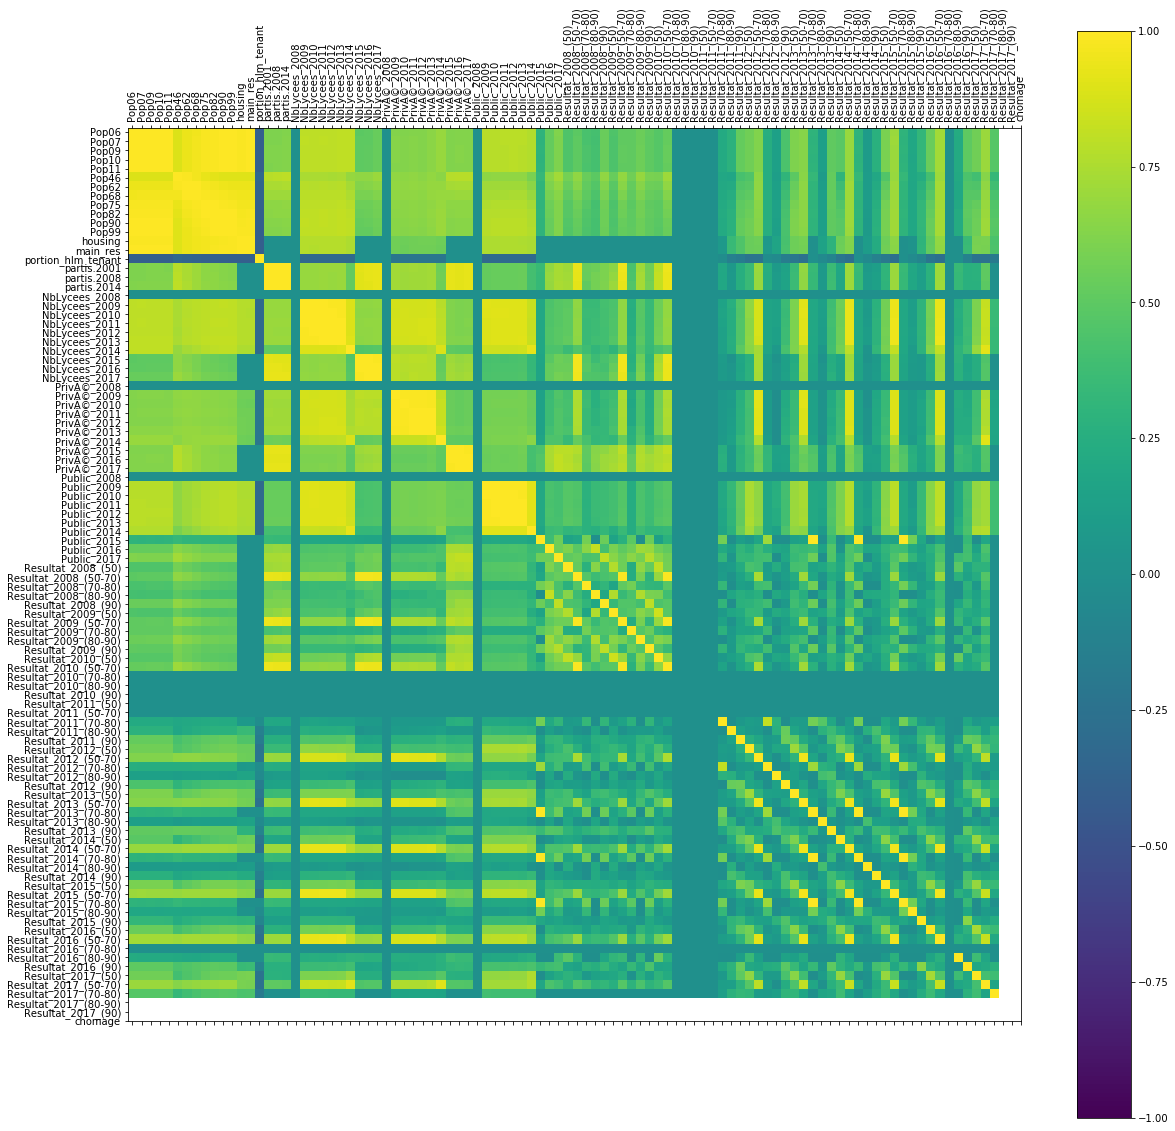

In [29]:
correlations = df.corr(method='pearson')

for column in correlations :
    for line in correlations.index :
        if np.isnan(correlations.loc[line, column]) :
            correlations.loc[line,column] = 0

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,99,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(features, rotation='vertical')
ax.set_yticklabels(features)
plt.show()

In [30]:
correlations.sample(10)

,Pop06,Pop07,Pop09,Pop10,Pop11,Pop46,Pop62,Pop68,Pop75,Pop82,...,Resultat_2016_(50-70),Resultat_2016_(70-80),Resultat_2016_(80-90),Resultat_2016_(90),Resultat_2017_(50),Resultat_2017_(50-70),Resultat_2017_(70-80),Resultat_2017_(80-90),Resultat_2017_(90),chomage
Resultat_2013_(50-70),0.134576,0.134626,0.134219,0.133651,0.133937,0.124328,0.139929,0.140281,0.144946,0.142810,...,-0.002672,0.296006,0.115469,0.077544,0.0,-0.001541,0.252495,0.100037,0.004930,0.130382
Public_2017,0.770901,0.771528,0.769730,0.769626,0.769777,0.594869,0.654363,0.689612,0.729077,0.751887,...,0.090777,0.324532,0.661297,0.714817,0.0,0.269781,0.436300,0.765314,0.777984,0.383783
Public_2012,0.786033,0.786617,0.784127,0.783824,0.783748,0.662546,0.710968,0.737876,0.763204,0.778273,...,0.105236,0.359206,0.642801,0.793294,0.0,0.202254,0.421352,0.675792,0.719403,0.394432
Resultat_2011_(80-90),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
NbLycees_2011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
NbLycees_2013,0.799893,0.801274,0.799770,0.799497,0.798702,0.744004,0.779047,0.791258,0.800597,0.808821,...,0.120052,0.303277,0.582464,0.937293,0.0,0.251994,0.362531,0.609355,0.828927,0.345523
Resultat_2008_(50-70),0.524315,0.523824,0.529355,0.530986,0.529555,0.648118,0.612792,0.586458,0.555929,0.552337,...,0.215522,0.144004,0.276627,0.412973,0.0,-0.002041,0.383591,0.154380,0.433854,0.000000
NbLycees_2014,0.804434,0.805807,0.804190,0.803975,0.803158,0.747496,0.782608,0.794692,0.803877,0.812797,...,0.117738,0.297452,0.577724,0.945078,0.0,0.247501,0.364471,0.609271,0.830119,0.345300
Resultat_2010_(50),0.513288,0.509643,0.512499,0.512756,0.511984,0.570238,0.530024,0.509385,0.494096,0.502007,...,0.286783,0.094325,0.071883,0.263194,0.0,-0.001541,0.339148,0.022903,0.294490,0.000000
Pop06,1.000000,0.999908,0.999545,0.999438,0.999403,0.893024,0.938752,0.960518,0.979373,0.990626,...,0.189596,0.322980,0.540219,0.722277,0.0,0.226855,0.504537,0.564106,0.700497,0.471139


In [ ]:
cleaned_data = dataframe.drop(['Resultat_2009_(90)', 'Resultat_2010_(50)', 'Resultat_2010_(70-80)', 'Resultat_2010_(80-90)', 'Resultat_2010_(90)', 'Resultat_2011_(50)', 'Resultat_2011_(50-70)', 'Resultat_2011_(70-80)'], axis=1)

cleaned_features = list(cleaned_data.columns)

print(cleaned_features, len(cleaned_features))

In [ ]:
cleaned_correlations = cleaned_data.corr(method='pearson')

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(cleaned_correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,91,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cleaned_features, rotation='vertical')
ax.set_yticklabels(cleaned_features)
plt.show()

In [ ]:
test_features = list(test.columns)

print(test_features, len(test_features))

In [ ]:
test_correlations = test.corr(method='pearson')

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(test_correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,110,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(test_features, rotation='vertical')
ax.set_yticklabels(test_features)
plt.show()

## Heat map

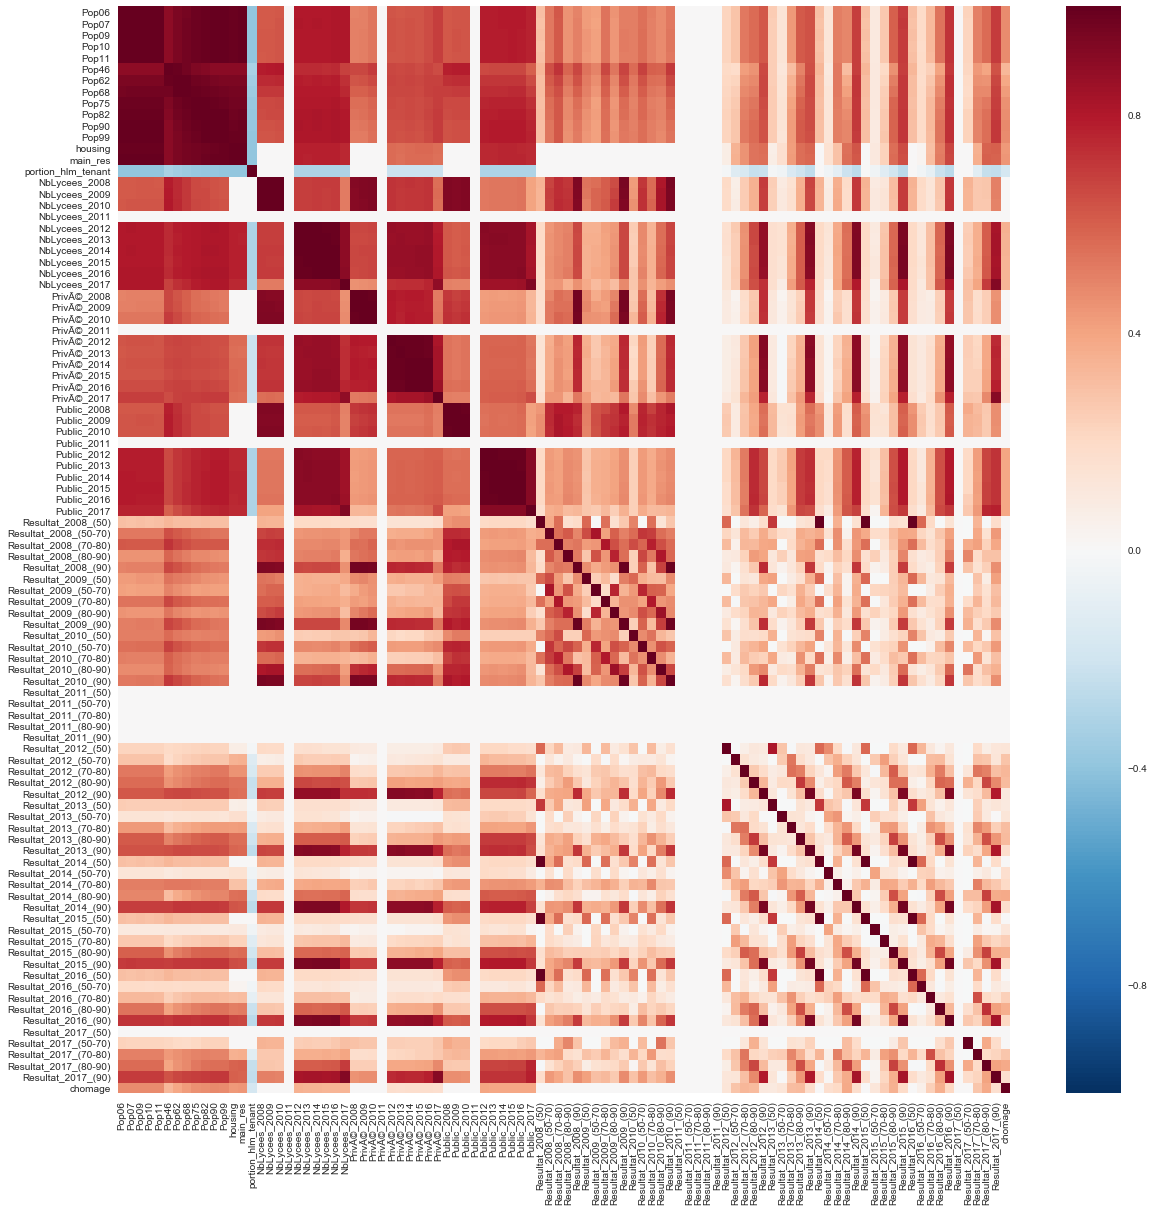

In [33]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(correlations,
            xticklabels=correlations.columns.values,
            yticklabels=correlations.columns.values)
sns.plt.show()

# Prediction

In [ ]:
null_columns=dataframe.columns[dataframe.isnull().any()]

In [ ]:
pred_sample = dataframe[dataframe.isnull().any(axis=1)][null_columns]

In [ ]:
pred_sample

In [ ]:
null_columns

### Delete small cities

In [ ]:
sc_indices = np.where(dataframe[''] >= threshold)
outliers = y[outliers_indices]
    
X = np.delete(X, outliers_indices, axis=0)
y = np.delete(y, outliers_indices, axis=0)